In [28]:
import os
import numpy as np
import pandas as pd
from datetime import datetime,time
import utils as u
import signals
from tqdm import tqdm

### Optimal min peak restriction

The best restriction is no restriction (??)

In [7]:
changes = np.linspace(0.93,1.00,15)
pnl = []
for change in tqdm(changes):
    signal = signals.signal_analysis(min_peak_change=change)
    pnl.append(signal['return'].sum()) # t takes datetime.time
#     signals.graph_profit(signal)
pnl

100%|██████████| 15/15 [01:34<00:00,  6.29s/it]


[4.220000000000001,
 3.22,
 3.68,
 4.5600000000000005,
 4.99,
 6.83,
 6.26,
 5.71,
 5.16,
 6.08,
 6.53,
 6.53,
 6.53,
 6.960000000000001,
 6.960000000000001]

### Signal data 

In [3]:
signals.signal_analysis()

,event_id,minutes,line,chl_hi,chl_low,odd_change,peak,peak_change,signal,result_corner,correct_prediction,return
0,20200217MON12,2020-02-17 01:36:59,6.5,2.50,1.46,1.258621,1,0.9359,1,4.0,1,0.46
1,20200217MON10,2020-02-17 01:35:26,18.5,2.55,1.45,1.271930,1,0.9667,1,13.0,1,0.45
2,20200220THU20,2020-02-20 01:34:58,14.5,2.48,1.47,1.278261,1,0.9545,1,13.0,1,0.47
3,20200218TUE1,2020-02-18 01:34:03,15.5,2.60,1.43,1.265487,1,0.9931,0,15.0,0,0.00
4,20200214FRI29,2020-02-14 01:30:52,6.5,2.60,1.43,1.254386,1,0.9597,1,10.0,0,-1.00
5,20200218TUE2,2020-02-18 01:31:31,9.5,2.20,1.59,1.325000,1,1.2520,-1,9.0,0,-1.00
6,20200220THU1,2020-02-20 01:32:49,9.5,2.50,1.46,1.269565,1,0.9542,1,9.0,1,0.46
7,20200218TUE3,2020-02-18 01:34:42,14.5,2.50,1.46,1.269565,1,0.9733,1,14.0,1,0.46
8,20200220THU22,2020-02-20 01:33:18,18.5,2.55,1.45,1.178862,1,1.0902,-1,20.0,1,1.55
9,20200215SAT3,2020-02-15 01:35:21,14.5,2.50,1.46,1.247863,1,0.9419,1,13.0,1,0.46


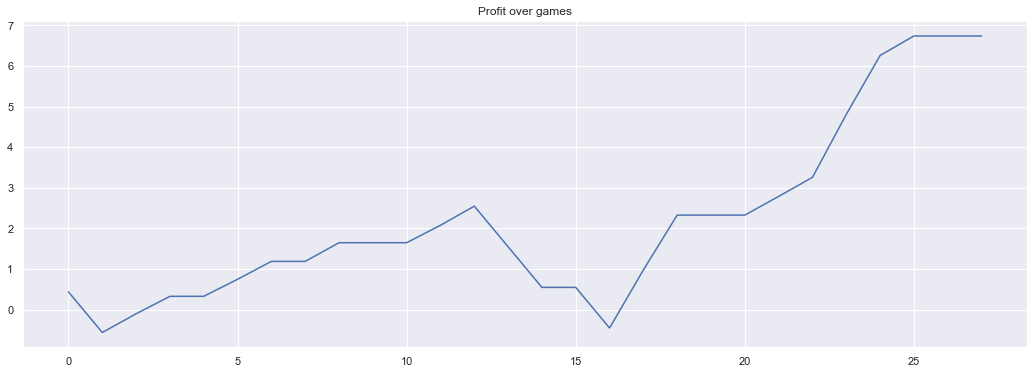

In [31]:
signal = signals.signal_analysis(min_peak_change=0.96)
signals.graph_profit(signal)

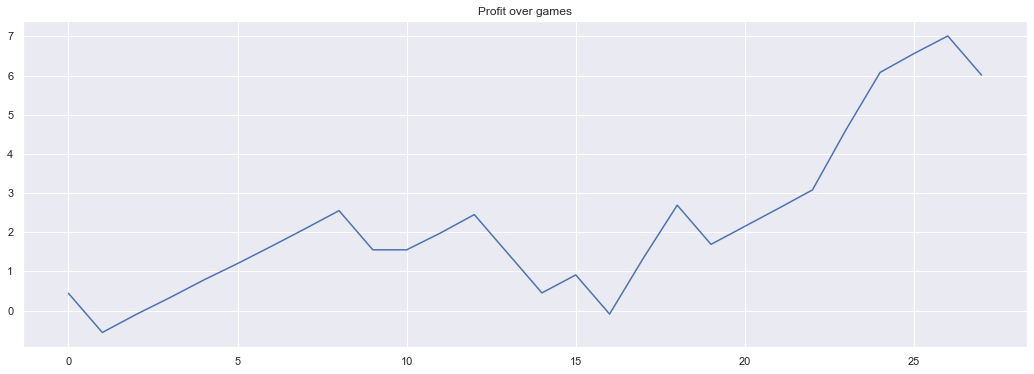

In [32]:
signal = signals.signal_analysis(min_peak_change=0.98)
signals.graph_profit(signal)

### Plot one game

In [35]:
data = u.signal_data_pipeline('20200221FRI1')
# u.graph(data.minutes,data.chl_low,'Plot')
data

,event_id,minutes,line,chl_hi,chl_low
0,20200221FRI1,2020-02-21 00:00:17,13.5,4.25,1.18
1,20200221FRI1,2020-02-21 00:00:17,13.5,4.25,1.18
2,20200221FRI1,2020-02-21 00:00:17,13.5,4.25,1.18
3,20200221FRI1,2020-02-21 00:00:27,13.5,4.25,1.18
4,20200221FRI1,2020-02-21 00:00:27,13.5,4.25,1.18
...,...,...,...,...,...
1127,20200221FRI1,2020-02-21 01:49:06,10.5,2.83,1.37
1128,20200221FRI1,2020-02-21 01:49:16,10.5,2.83,1.37
1129,20200221FRI1,2020-02-21 01:49:27,10.5,3.30,1.28
1130,20200221FRI1,2020-02-21 01:49:37,10.5,3.30,1.28


### Baseline model
Random bet on lowest chl_low at a specified t

In [18]:
def baseline_model(t):
    signal_list = None
    for event_id in [file[:-4] for file in os.listdir('data/') if '2020' in file]:
        # data pipeline
        data = u.signal_data_pipeline(event_id)
        data = data[data.minutes >= datetime.combine(datetime.strptime(event_id[:8],"%Y%m%d"), t)]
        peaks = data
        if signal_list is None:
            if peaks.empty == False:
                signal_list = peaks.iloc[[0]]
        else:
            if peaks.empty == False:
                signal_list = pd.concat([signal_list, peaks.iloc[[0]]], ignore_index=True)

    # merge current results
    result = pd.read_csv('/Users/TysonWu/dev/odds-crawl-app/odds-crawl-app/development/result_collection/match_corner_result.csv')
    signals = signal_list.merge(result[['event_id', 'result_corner']], how='inner', on='event_id')

    # exclude games without results
    signals = signals[~signals.result_corner.isna()]

    # calculate return
    signals['correct_prediction'] = np.where(signals.line > signals.result_corner, 1, 0)
    signals['return'] = np.where(signals.correct_prediction == 1, signals.chl_low-1, -1)
    signals = signals.sort_values(by='event_id').reset_index(drop=True)
    return signals['return'].sum()

100%|██████████| 36/36 [03:41<00:00,  6.16s/it]


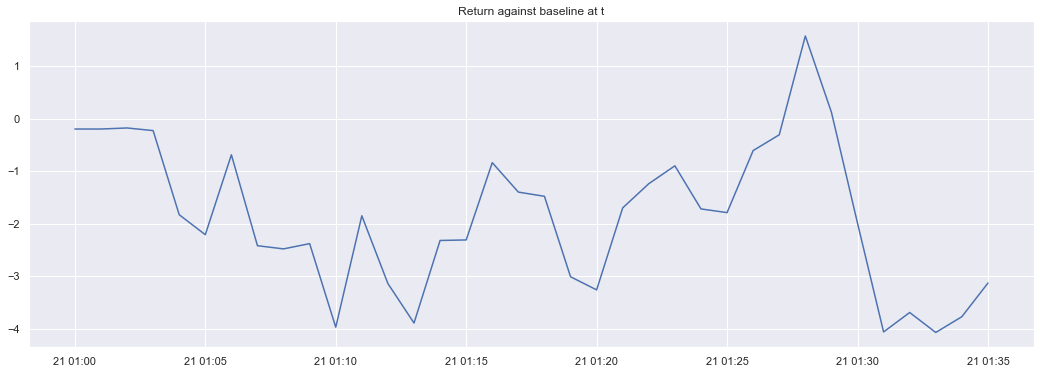

In [20]:
from tqdm import tqdm
from datetime import date

# timelist = [time(0,i,0) for i in range(60)] + [time(1,i,0) for i in range(36)]
timelist = [time(1,i,0) for i in range(36)]
pnl = []
for times in tqdm(timelist):
    profit = baseline_model(t=times)
    pnl.append(profit) # t takes datetime.time

u.graph([datetime.combine(date.today(), time)for time in timelist], pnl, 'Return against baseline at t')